# Import libabries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data and set path

In [3]:
df = pd.read_pickle(r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis\02 Data\Prepared Data\orders_products_agg.pkl')

In [4]:
path = r'C:\Users\christina.savva\Documents\CF Achievement 4 - Instacart Basket Analysis'

In [5]:
path

'C:\\Users\\christina.savva\\Documents\\CF Achievement 4 - Instacart Basket Analysis'

In [6]:
df.head()

order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2398795        1             2                  3                  7   
2    473747        1             3                  3                 12   
3   2254736        1             4                  4                  7   
4    431534        1             5                  4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  department_id  prices  _merge    price_range_loc  \
0         Soda  ...              7     9.0    both  Mid-range product   
1         Soda  ...              7     9.0    both  Mid-range product   
2         Soda  ...              7     9.0    both  Mid-range product   
3         Soda  ...              7     9.0    both  Mid-range product   
4         Soda  ...              7     9.0    both  Mid-range product   

      busiest_day    busiest_days order_hour_of_day_loc busiest_period_of_day  \
0  Regularly busy  Regularly busy         Fewest orders        Average orders   
1  Regularly busy      Least busy         Fewest orders        Average orders   
2  Regularly busy      Least busy         Fewest orders           Most orders   
3      Least busy      Least busy         Fewest orders        Average orders   
4      Least busy      Least busy         Fewest orders           Most orders   

  max_order  loyalty_flag  
0        10  New customer  
1        10  New customer  
2        10  New customer  
3        10  New customer  
4        10  New customer  

[5 rows x 21 columns]

In [10]:
df_ords_prods_merge = df

# Bar charts

<AxesSubplot:>

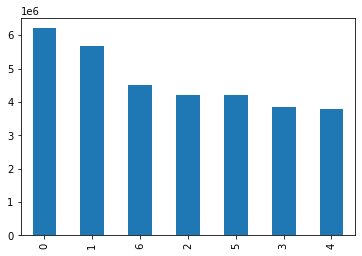

In [13]:
df_ords_prods_merge['order_day_of_week'].value_counts().plot.bar()  #  create a bar chart

<AxesSubplot:>

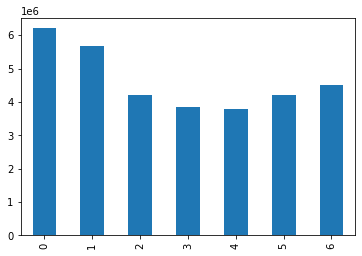

In [14]:
df_ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [15]:
df_ords_prods_merge['order_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [17]:
df_ords_prods_merge['order_day_of_week'].value_counts(dropna = False).sort_index()  #  indexing

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

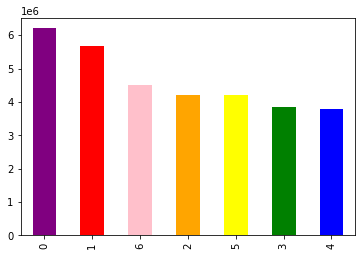

In [20]:
df_ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])  #  adding colours

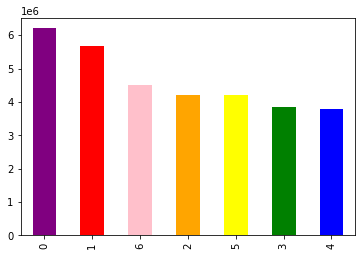

In [22]:
bar = df_ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])  #  saving chart as bar object

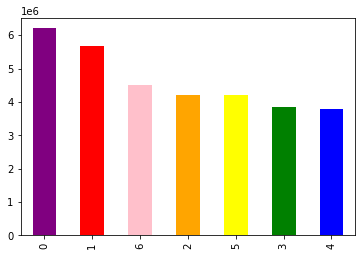

In [23]:
bar.figure

In [49]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))  #  exporting chart

# Histograms

<AxesSubplot:ylabel='Frequency'>

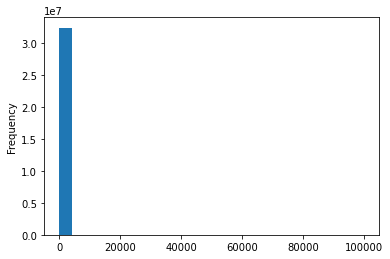

In [30]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [36]:
df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [34]:
df_ords_prods_merge['prices'].mean()

11.980225638467232

In [37]:
df_ords_prods_merge['prices'].median()

7.4

In [38]:
df_ords_prods_merge['prices'].min()

1.0

In [39]:
df_ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

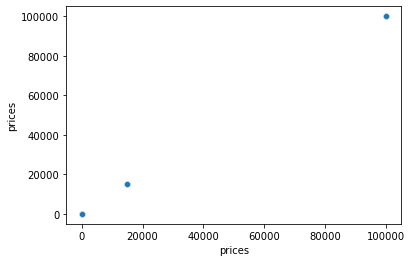

In [33]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

In [40]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]  #  checking for prices > 100

order_id  user_id  order_number  order_day_of_week  \
10030345    912404       17            12                  2   
10030346    603376       17            22                  6   
10030347   3264360      135             2                  2   
10030348    892534      135             3                  0   
10030349    229704      342             8                  1   
...            ...      ...           ...                ...   
29166209   2249946   204099            29                  0   
29166210   2363282   204099            31                  0   
29166211   3181945   204395            13                  3   
29166212   2486215   205227             7                  3   
29166213   2232716   205227            10                  0   

          order_hour_of_day  days_since_prior_order  product_id  \
10030345                 14                     5.0       21553   
10030346                 16                     4.0       21553   
10030347                 21                    13.0       21553   
10030348                  8                    12.0       21553   
10030349                 19                    30.0       21553   
...                     ...                     ...         ...   
29166209                  8                     4.0       33664   
29166210                  9                     2.0       33664   
29166211                 15                     8.0       33664   
29166212                 20                     4.0       33664   
29166213                 11                     4.0       33664   

          add_to_cart_order  reordered                      product_name  ...  \
10030345                  5          0  Lowfat 2% Milkfat Cottage Cheese  ...   
10030346                  3          1  Lowfat 2% Milkfat Cottage Cheese  ...   
10030347                  6          0  Lowfat 2% Milkfat Cottage Cheese  ...   
10030348                  3          1  Lowfat 2% Milkfat Cottage Cheese  ...   
10030349                  9          0  Lowfat 2% Milkfat Cottage Cheese  ...   
...                     ...        ...                               ...  ...   
29166209                  1          0             2 % Reduced Fat  Milk  ...   
29166210                  1          1             2 % Reduced Fat  Milk  ...   
29166211                 25          0             2 % Reduced Fat  Milk  ...   
29166212                  8          0             2 % Reduced Fat  Milk  ...   
29166213                 23          1             2 % Reduced Fat  Milk  ...   

          department_id   prices  _merge     price_range_loc     busiest_day  \
10030345             16  14900.0    both  High-range product  Regularly busy   
10030346             16  14900.0    both  High-range product  Regularly busy   
10030347             16  14900.0    both  High-range product  Regularly busy   
10030348             16  14900.0    both  High-range product     Busiest day   
10030349             16  14900.0    both  High-range product  Regularly busy   
...                 ...      ...     ...                 ...             ...   
29166209             16  99999.0    both  High-range product     Busiest day   
29166210             16  99999.0    both  High-range product     Busiest day   
29166211             16  99999.0    both  High-range product  Regularly busy   
29166212             16  99999.0    both  High-range product  Regularly busy   
29166213             16  99999.0    both  High-range product     Busiest day   

            busiest_days order_hour_of_day_loc busiest_period_of_day  \
10030345  Regularly busy         Fewest orders           Most orders   
10030346  Regularly busy         Fewest orders           Most orders   
10030347  Regularly busy         Fewest orders        Average orders   
10030348    Busiest days         Fewest orders        Average orders   
10030349    Busiest days         Fewest orders        Average orders   
...                  ...                   ...                   ...  

In [42]:
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan  #  mark numbers as missing (turn into NaNs)

In [44]:
df_ords_prods_merge['prices'].max()  #  check whether replacement was successful

25.0

<AxesSubplot:ylabel='Frequency'>

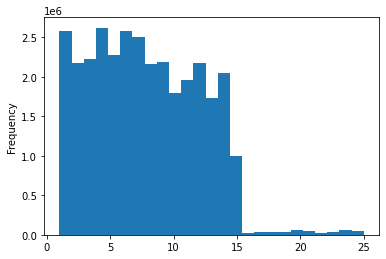

In [45]:
df_ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

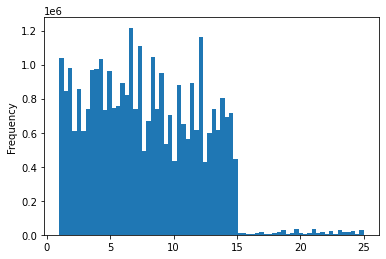

In [46]:
df_ords_prods_merge['prices'].plot.hist(bins = 70)  #   increase level of granularity by increasing number of bins

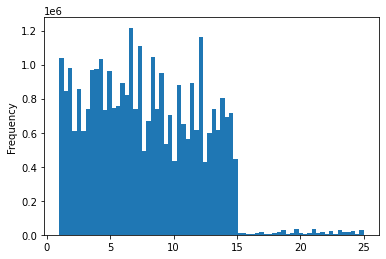

In [50]:
hist = df_ords_prods_merge['prices'].plot.hist(bins = 70)  #  saving chart as bar object

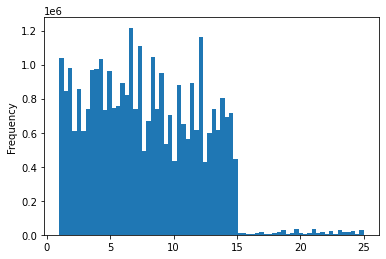

In [52]:
hist.figure

In [53]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders_dow.png'))  #  exporting chart

# Line charts

In [55]:
df = df_ords_prods_merge[:2000000]  #  creating subset to save memory -- will not work as not representative of the entire population

In [63]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7  #  creating a list holding True/False to the test nprandon.rant() <= 0.7

In [60]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [64]:
big = df_ords_prods_merge[dev]  #  stores 70% of the sample in DF big

In [65]:
small = df_ords_prods_merge[~dev]  #  stores 30% of the sample in DF small

In [68]:
len(df_ords_prods_merge)  #  checking number of rows

32404859

In [69]:
len(big) + len(small)

32404859

In [72]:
df_2 = small[['order_day_of_week','prices']]  #  removing columns that are not required to save memory

In [73]:
df_2.head()

order_day_of_week  prices
0                   2     9.0
2                   3     9.0
3                   4     9.0
6                   1     9.0
10                  1     9.0

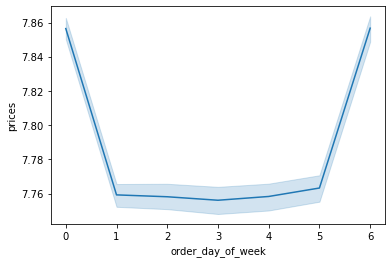

In [75]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')